In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import *
from sklearn import model_selection
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns

Import CSV train_clean

In [2]:
train_clean = pd.read_csv('../Clean/train_clean.csv')

In [3]:
train_clean.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price
0,0,1.21,1,5,5,63.0,57.0,6134
1,1,0.28,3,1,3,64.0,56.0,532
2,2,0.42,2,3,4,61.2,58.0,1103
3,3,0.26,1,5,1,61.1,57.0,600
4,4,1.10,4,4,6,63.4,57.0,4997


Prepering data for trainig

In [7]:
X = train_clean.drop(['price'],axis=1)
y = train_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Model 1 : Random forest Regressor

In [9]:
model1 = RandomForestRegressor(n_estimators=500, max_depth=20, min_samples_leaf=3, random_state=111)
selector = RFECV(model1, step=1, cv=5)

model1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=111, verbose=0, warm_start=False)

 RMSE: 546.44

In [11]:
print('Random forest RMSE:', np.sqrt(mean_squared_error(y_test, model1.predict(X_test))))

Random forest RMSE: 576.9907318494932


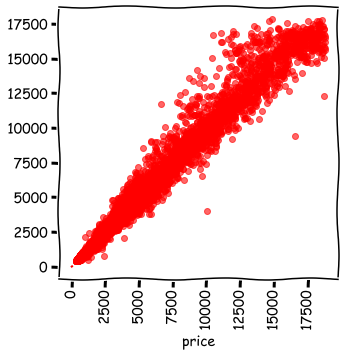

In [44]:
with plt.xkcd():
    plt.figure(figsize=(5,5))
    sns.regplot(y_test, model1.predict(X_test), color='red', scatter_kws={'alpha':0.6}, fit_reg=False)
    sns.lineplot([12, 33], [12, 33], color='red')
    plt.xticks( rotation=90)

## Model 2. KNeighborsRegressor

In [17]:
model2 = KNeighborsRegressor(n_neighbors=3)
model2.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

RMSE 1868.46

In [19]:
print('KNeighborsRegressor RMSE:', np.sqrt(mean_squared_error(y_test, model2.predict(X_test))))

KNeighborsRegressor RMSE: 4410.159833154081


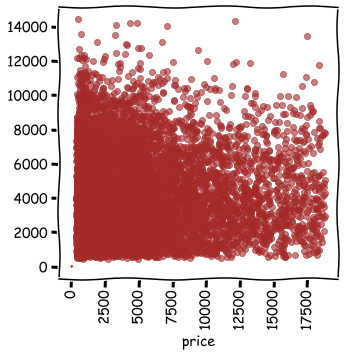

In [45]:
with plt.xkcd():
    plt.figure(figsize=(5,5))
    sns.regplot(y_test, model2.predict(X_test), color='brown', scatter_kws={'alpha':0.6}, fit_reg=False)
    sns.lineplot([12, 33], [12, 33], color='red')
    plt.xticks( rotation=90)

## Model 3. Gradient Boosting Regressor

In [21]:
params = {'n_estimators': 750, 'max_depth': 8, 'min_samples_split': 25, 'min_samples_leaf':10,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

RMSE 522.21

In [22]:
print("GBR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

GBR RMSE: 548.7214203003464


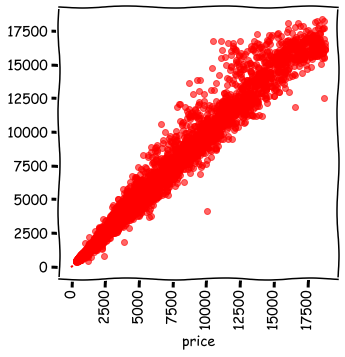

In [46]:
with plt.xkcd():
    plt.figure(figsize=(5,5))
    sns.regplot(y_test, clf.predict(X_test), color='red', scatter_kws={'alpha':0.6}, fit_reg=False)
    sns.lineplot([12, 33], [12, 33], color='red')
    plt.xticks( rotation=90)

## Model 4. SVR

In [25]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

RMSE 4203.46

In [26]:
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

SVR RMSE: 4263.393832218457


## Save the best of our models, the lower RMSE the better.

Model 3. Gradient Boosting Regressor RMSE: 522.21

In [ ]:
joblib.dump(clf, '../Models/GBR.sav')